<a href="https://colab.research.google.com/github/veltech-soc/DV_Tasks/blob/main/DV_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prajwaldongre/call-of-duty-mobile-weapons")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'call-of-duty-mobile-weapons' dataset.
Path to dataset files: /kaggle/input/call-of-duty-mobile-weapons


In [ ]:
/kaggle/input/call-of-duty-mobile-weapons

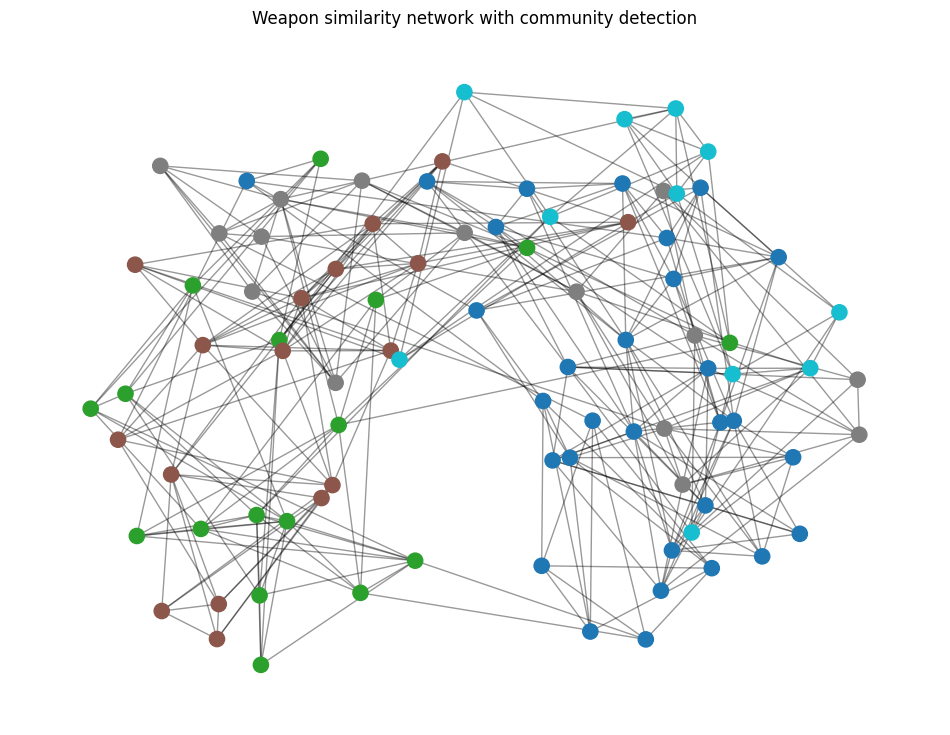

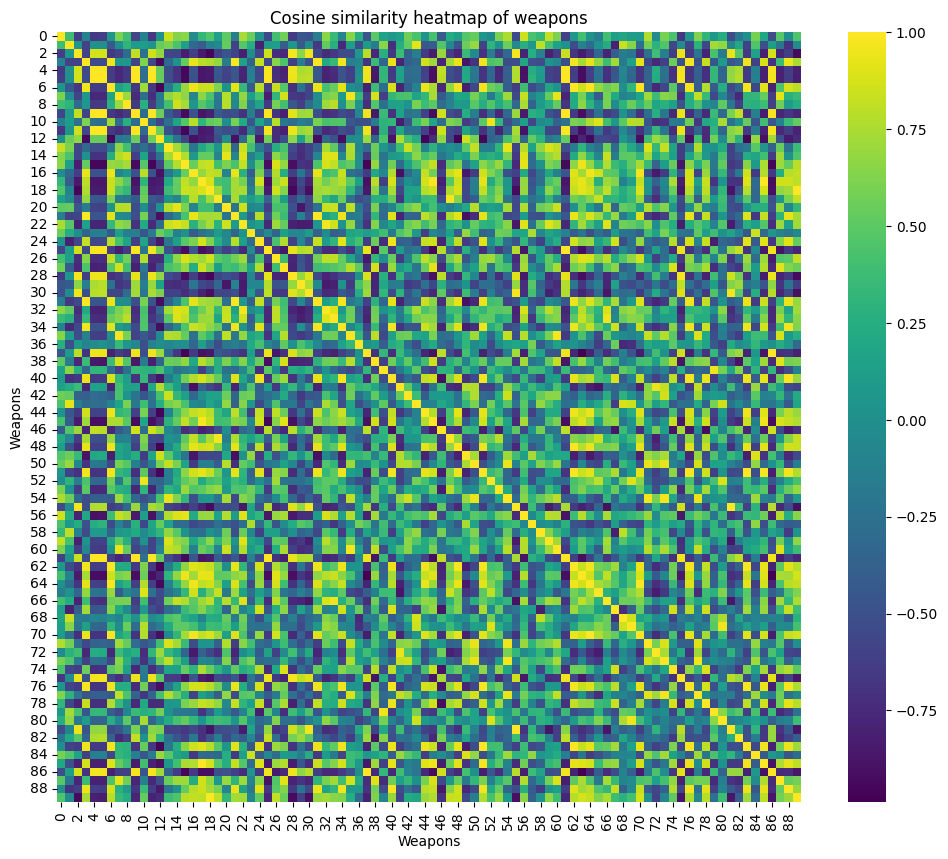

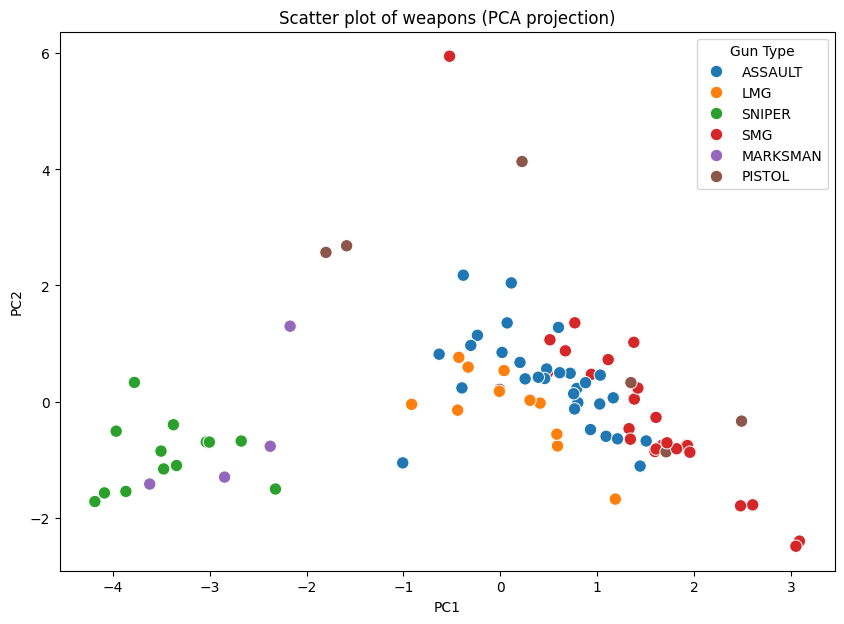

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from networkx.algorithms import community

csv_path = "/kaggle/input/call-of-duty-mobile-weapons/CODM Weapons.csv"
df = pd.read_csv(csv_path)
num_cols = ['DAMAGE','FIRE RATE','ACCURACY','MOBILITY','RANGE','CONTROL']
top_k = 5
labels_to_show = 15

X = df[num_cols].values
Xs = StandardScaler().fit_transform(X)
sim = cosine_similarity(Xs)

G = nx.Graph()
for i, row in df.iterrows():
    G.add_node(i, label=row['GUN NAME'], gun_type=row['GUN TYPE'],
               avg_stat=float(np.mean(row[num_cols])))

for i in range(len(df)):
    sims = sim[i].copy()
    sims[i] = -1.0
    top_inds = np.argsort(sims)[-top_k:][::-1]
    for j in top_inds:
        w = float(sim[i,j])
        if w > 0:
            if not G.has_edge(i,j):
                G.add_edge(i,j,weight=w)

pos = nx.spring_layout(G, seed=42, k=0.7)

# community detection
communities = community.greedy_modularity_communities(G)
node_colors = {}
for cid, comm in enumerate(communities):
    for node in comm:
        node_colors[node] = cid
color_list = [node_colors[n] for n in G.nodes()]

plt.figure(figsize=(12,9))
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos, node_color=color_list, cmap="tab10", node_size=120)
plt.title("Weapon similarity network with community detection")
plt.axis('off')
plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(sim, cmap="viridis")
plt.title("Cosine similarity heatmap of weapons")
plt.xlabel("Weapons")
plt.ylabel("Weapons")
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xs)
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['GUN TYPE'], s=80, palette="tab10")
plt.title("Scatter plot of weapons (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Gun Type")
plt.show()

100%|██████████| 1.60k/1.60k [00:00<00:00, 2.16MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/prajwaldongre/call-of-duty-mobile-weapons/versions/1
